### Techninal Report for Obesity & it’s Impact on the Economy Project
- this is the document for where my code for visuals will be provided. 

#### My first dataset is from the World Bank. I extracted the features most relevant to my project, selecting all available countries and a 25-year time period to ensure sufficient data coverage. Here are some of features in the dataset:

1. GDP per capita, PPP (current international $)

2. GDP growth (annual %)

3. Current health expenditure per capita (current US$)

4. Current health expenditure (% of GDP)

5. Life expectancy at birth (years)

6. Labor force participation rate (% of population ages 15+)

7. Unemployment, total (% of total labor force)

8. Government expenditure on education (% of GDP)

9. GINI index (World Bank estimate)

10. Urban population (% of total population)

- Source: https://databank.worldbank.org/source/world-development-indicators# 


#### My second dataset is from the WHO Global Health Observatory. I chose this dataset because it is the most credible source of global BMI tracking, ensuring accurate measurements for my analysis. It includes: 

1.  gender
2.  country
3.  year
4.  adult obesity prevalence (BMI ≥ 30, age-standardized)

- Source: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-obesity-among-adults-bmi-=-30-(age-standardized-estimate)-(-)

### First step: Understanding the data 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# load
wb = pd.read_csv("world_bank.csv")
who = pd.read_csv("bmi.csv")   # your WHO file; earlier you called it bmi.csv

# basic inspection
print(wb.shape)
print(wb.columns.tolist()[:30])
wb.head()

print(who.shape)
print(who.columns.tolist()[:30])
who.head()


(2665, 29)
['Country Name', 'Country Code', 'Series Name', 'Series Code', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']
(19701, 34)
['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode', 'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location', 'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix', 'FactValueNume

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,ETH,Ethiopia,Year,2022,...,NaN,NaN,0.60,NaN,1.69,1.1 [0.6-1.7],NaN,NaN,EN,2024-02-29T05:00:00.000Z
1,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,SEAR,South-East Asia,Country,TLS,Timor-Leste,Year,2022,...,NaN,NaN,0.87,NaN,2.54,1.6 [0.9-2.5],NaN,NaN,EN,2024-02-29T05:00:00.000Z
2,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,RWA,Rwanda,Year,2022,...,NaN,NaN,1.16,NaN,2.56,1.8 [1.2-2.6],NaN,NaN,EN,2024-02-29T05:00:00.000Z
3,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,WPR,Western Pacific,Country,VNM,Viet Nam,Year,2022,...,NaN,NaN,1.26,NaN,2.77,1.9 [1.3-2.8],NaN,NaN,EN,2024-02-29T05:00:00.000Z
4,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,EMR,Eastern Mediterranean,Country,YEM,Yemen,Year,2022,...,NaN,NaN,6.01,NaN,15.78,10.1 [6.0-15.8],NaN,NaN,EN,2024-02-29T05:00:00.000Z


### Dataset 1 (2665 × 29) 
- is in wide format, values for many years in the same row.
- This is easier for a quick look but will be harder for analysis until reshaped.

### Dataset 2 (19701 × 34) 
- is in long format, one row per year-country combo.
- this is more detailed with metadata which makes it better for analysis and visualization.

### Understanding the Columns & Values

In [7]:
# show unique series names in World Bank
wb['Series Name'].unique()[:50]

# show sample WHO columns & a few unique locations
who['Location'].unique()[:20]
who['SpatialDimValueCode'].unique()[:20]


array(['ETH', 'TLS', 'RWA', 'VNM', 'YEM', 'LAO', 'NAM', 'SEN', 'PHL',
       'MOZ', 'LKA', 'HTI', 'PRK', 'GAB', 'ZMB', 'DNK', 'BEN', 'IDN',
       'DJI', 'UGA'], dtype=object)

## Preprocessing for World Bank Dataset


In [9]:

# Drop any empty columns 
wb = wb.dropna(axis=1, how="all")

# Rename certain columns so both datasets match
wb = wb.rename(columns={
    "Country Name": "Country",
    "Country Code": "ISO3",
    "Series Name": "Indicator",
    "Series Code": "IndicatorCode"
})

# convert the wide format to long to match the other dataset
wb_long = wb.melt(
    id_vars=["Country", "ISO3", "Indicator", "IndicatorCode"],
    var_name="Year",
    value_name="Value"
)

# clean up the year column to only keep the year digits 
wb_long["Year"] = wb_long["Year"].str.extract(r"(\d{4})")  
wb_long["Year"] = wb_long["Year"].astype(int)

# convert value column to numeric
wb_long["Value"] = pd.to_numeric(wb_long["Value"], errors="coerce")

# drop rows with any missing values 
wb_long = wb_long.dropna(subset=["Value"])

wb_long.head()


,Country,ISO3,Indicator,IndicatorCode,Year,Value
0,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2000,813.550256
4,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,55.005000
5,Afghanistan,AFG,"Labor force participation rate, total (% of to...",SL.TLF.CACT.ZS,2000,46.571000
6,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2000,7.935000
9,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2000,22.078000


### Explanation 
1. Dropped empty columns. Some World Bank files include metadata columns with only NaNs, so we remove them.

2. Renamed columns which makes later merging easier (consistent names).

3. Melted wide to long so that it converts the dataset from having many year columns into one Year column, which is better for analysis & plotting.

4. Cleaned year to extract just the 4-digit year.

5. Converted Value to numeric to ensure calculations work correctly.

6. Dropped missing values so that it removes rows with no economic indicator values.

### Preprocessing for WHO BMI Dataset

In [106]:
import pandas as pd

# --- Load datasets ---
who = pd.read_csv("bmi.csv")
wb = pd.read_csv("world_bank.csv")

# --- World Bank preprocessing ---
# Drop empty columns
wb = wb.dropna(axis=1, how="all")

# Rename columns to match WHO dataset
wb = wb.rename(columns={
    "Country Name": "Country",
    "Country Code": "ISO3",
    "Series Name": "Indicator",
    "Series Code": "IndicatorCode"
})

# Convert from wide to long format
wb_long = wb.melt(
    id_vars=["Country", "ISO3", "Indicator", "IndicatorCode"],
    var_name="Year",
    value_name="Value"
)

# Clean and convert columns
wb_long["Year"] = wb_long["Year"].str.extract(r"(\d{4})").astype(int)
wb_long["Value"] = pd.to_numeric(wb_long["Value"], errors="coerce")
wb_long = wb_long.dropna(subset=["Value"])

# Filter for relevant indicators
wb_indicators = [
    "GDP per capita, PPP (current international $)",
    "Current health expenditure (% of GDP)"
]
wb_filtered = wb_long[wb_long['Indicator'].isin(wb_indicators)].copy()
wb_filtered = wb_filtered.rename(columns={"Indicator": "Measure"})
wb_filtered = wb_filtered[['ISO3', 'Country', 'Year', 'Measure', 'Value']]

# Pivot for merging
wb_pivot = wb_filtered.pivot_table(
    index=['ISO3', 'Country', 'Year'],
    columns='Measure',
    values='Value'
).reset_index()

# --- WHO preprocessing ---
who_clean = who[[
    "Location", "SpatialDimValueCode", "Period", "Indicator",
    "FactValueNumeric", "FactValueUoM"
]]
who_clean = who_clean.rename(columns={
    "Location": "Country",
    "SpatialDimValueCode": "ISO3",
    "Period": "Year",
    "Indicator": "Measure",
    "FactValueNumeric": "Value",
    "FactValueUoM": "Unit"
})

who_clean["Year"] = who_clean["Year"].astype(int)
who_clean["Value"] = pd.to_numeric(who_clean["Value"], errors="coerce")
who_clean = who_clean.dropna(subset=["Value"])

# Clean Measure column for special characters / whitespace
who_clean['Measure_clean'] = who_clean['Measure'].str.lower().str.strip()

# Keep only obesity indicators
who_obesity = who_clean[who_clean['Measure_clean'].str.contains("obesity")]

# --- Merge WHO + WB for latest common year ---
latest_common_year = 2022

who_filtered = who_obesity[who_obesity['Year'] == latest_common_year]
wb_filtered_year = wb_pivot[wb_pivot['Year'] == latest_common_year]

merged_df = pd.merge(
    who_filtered,
    wb_filtered_year,
    on=['ISO3', 'Year'],  # Merge only on ISO3 and Year
    how='inner',
    suffixes=('_WHO', '_WB')
)

# Optional: check if USA and other countries are included
merged_df[merged_df['ISO3'].isin(['USA', 'JPN', 'IND', 'DEU'])]

,Country_WHO,ISO3,Year,Measure,Value,Unit,Measure_clean,Country_WB,Current health expenditure (% of GDP),"GDP per capita, PPP (current international $)"
115,Germany,DEU,2022,"Prevalence of obesity among adults, BMI &Great...",18.43,NaN,"prevalence of obesity among adults, bmi &great...",Germany,12.605131,67589.839906
158,Germany,DEU,2022,"Prevalence of obesity among adults, BMI &Great...",20.40,NaN,"prevalence of obesity among adults, bmi &great...",Germany,12.605131,67589.839906
193,Germany,DEU,2022,"Prevalence of obesity among adults, BMI &Great...",22.33,NaN,"prevalence of obesity among adults, bmi &great...",Germany,12.605131,67589.839906
324,Japan,JPN,2022,"Prevalence of obesity among adults, BMI &Great...",3.53,NaN,"prevalence of obesity among adults, bmi &great...",Japan,11.421837,47395.839157
443,United States of America,USA,2022,"Prevalence of obesity among adults, BMI &Great...",40.85,NaN,"prevalence of obesity among adults, bmi &great...",United States,16.496140,77860.911291
453,United States of America,USA,2022,"Prevalence of obesity among adults, BMI &Great...",41.99,NaN,"prevalence of obesity among adults, bmi &great...",United States,16.496140,77860.911291
458,United States of America,USA,2022,"Prevalence of obesity among adults, BMI &Great...",43.15,NaN,"prevalence of obesity among adults, bmi &great...",United States,16.496140,77860.911291
485,India,IND,2022,"Prevalence of obesity among adults, BMI &Great...",5.21,NaN,"prevalence of obesity among adults, bmi &great...",India,3.305885,9207.127430
489,Japan,JPN,2022,"Prevalence of obesity among adults, BMI &Great...",5.54,NaN,"prevalence of obesity among adults, bmi &great...",Japan,11.421837,47395.839157
531,India,IND,2022,"Prevalence of obesity among adults, BMI &Great...",7.27,NaN,"prevalence of obesity among adults, bmi &great...",India,3.305885,9207.127430


### Explanation 
1. Subset of useful columns.  Removed metadata we don’t need (like Dim1, DataSource).

2. Renamed columns so that is it consistent with World Bank dataset (Country, ISO3, Year, Value).

3. Converted Year + Value to correct types so they can be plotted and merged.

4. Dropped missing values. 

5. Filtered indicator → Focused only on “Prevalence of obesity among adults”.


### What next? 
#### Both datasets now share Country, ISO3, and Year means they are in perfect shape for the merge step!
- below are the steps I took in order to merge the 2 datasets. 

In [108]:
print(wb_long.columns)


Index(['Country', 'ISO3', 'Indicator', 'IndicatorCode', 'Year', 'Value'], dtype='object')


In [110]:
wb_indicators = [
    "GDP per capita, PPP (current international $)",
    "Current health expenditure (% of GDP)"
]

wb_filtered = wb_long[wb_long['Indicator'].isin(wb_indicators)].copy()
wb_filtered = wb_filtered.rename(columns={"Indicator": "Measure"})
wb_filtered = wb_filtered[['ISO3', 'Country', 'Year', 'Measure', 'Value']]

wb_pivot = wb_filtered.pivot_table(
    index=['ISO3', 'Country', 'Year'],
    columns='Measure',
    values='Value'
).reset_index()


### Pivot World Bank data to wide format (one row per country-year)

In [112]:
wb_pivot = wb_filtered.pivot_table(
    index=['ISO3', 'Country', 'Year'],
    columns='Measure',
    values='Value'
).reset_index()


### Merge WHO BMI dataset with pivoted World Bank data

In [114]:
print(merged_df.shape)
merged_df.info()
merged_df.describe()


(579, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country_WHO                                    579 non-null    object 
 1   ISO3                                           579 non-null    object 
 2   Year                                           579 non-null    int64  
 3   Measure                                        579 non-null    object 
 4   Value                                          579 non-null    float64
 5   Unit                                           0 non-null      float64
 6   Measure_clean                                  579 non-null    object 
 7   Country_WB                                     579 non-null    object 
 8   Current health expenditure (% of GDP)          567 non-null    float64
 9   GDP per capita, PPP (current international $

,Year,Value,Unit,Current health expenditure (% of GDP),"GDP per capita, PPP (current international $)"
count,579.0,579.000000,0.0,567.000000,564.000000
mean,2022.0,23.226390,NaN,6.898829,27418.551151
std,0.0,13.469548,NaN,3.285995,28668.691342
min,2022.0,1.060000,NaN,1.817682,888.518158
25%,2022.0,12.855000,NaN,4.385459,6236.114032
50%,2022.0,22.250000,NaN,6.500235,16625.088968
75%,2022.0,31.075000,NaN,8.851702,40978.245836
max,2022.0,80.090000,NaN,23.088169,143381.897534


### Key Takeaways from this Output

#### Dataset is successfully merged. Each row now has obesity + economic indicators for the same country-year.

- Wide variation exists: Some countries have very high GDP or health expenditure, some very low.

- Obesity prevalence ranges dramatically across countries.

- Missing economic data: Some health expenditure or GDP values are missing.

- Unit column is useless.


### Results:
- We merged the WHO adult obesity prevalence data with World Bank economic indicators for 579 country-year entries for 2022. The dataset includes:

1. Obesity prevalence (Value): Mean prevalence across countries is 23.2%, ranging from 1.06% to 80.09%, with a median of 22.25%.

2. Current health expenditure (% of GDP): Average is 6.9%, ranging from 1.82% to 23.09%. Some missing data exists (567 non-null entries).

3. GDP per capita, PPP: Average is approximately $27,418 from $889 to $143,382; 564 non-null entries indicate some missing values.

4. All entries correspond to the year 2022, and all countries have WHO obesity data, while most also have the economic indicators.

### Now onto the fun part! Visuals!

### Visual 1: Global BMI Distribution

#### Purpose: Show worldwide distribution of obesity prevalence.

/var/folders/j1/rydq6xn178q8p1rrxbwmhy4c0000gn/T/ipykernel_4479/2716568992.py:37: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



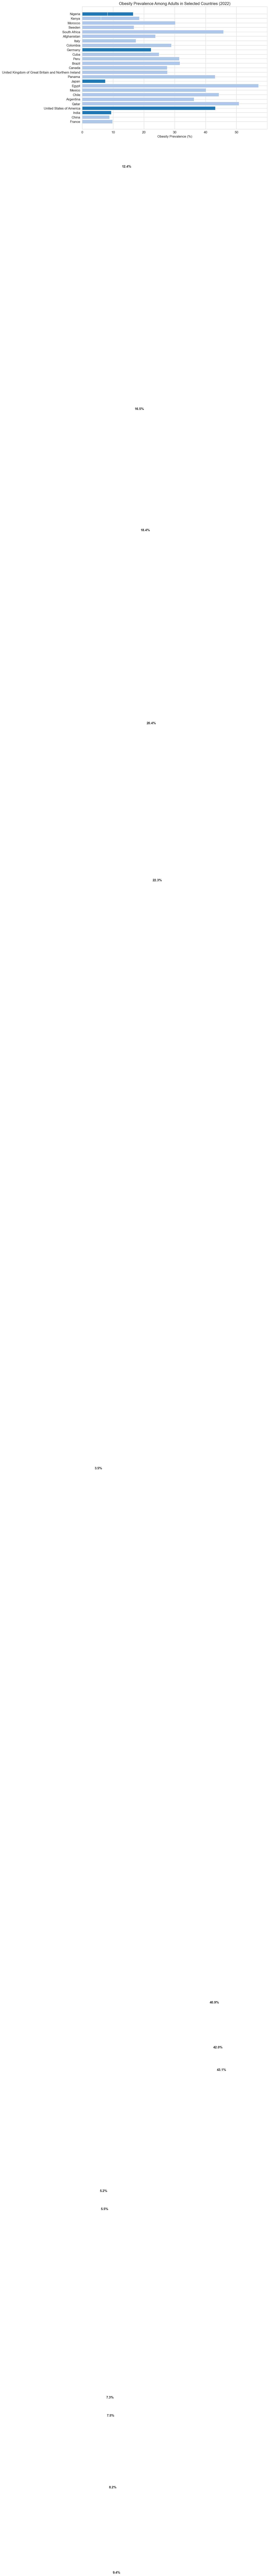

In [133]:
sns.set_style('whitegrid')  

# Set a cohesive color palette
sns.set_palette("Blues")  # gradient-friendly, visually appealing
plt.rcParams.update({'font.size': 12, 'figure.figsize': (12,8)})

# Hand-picked 25 countries (5 per continent)
selected_countries = [
    'USA', 'CAN', 'MEX', 'CUB', 'PAN',       # North America
    'BRA', 'PER', 'ARG', 'COL', 'CHL',       # South America
    'DEU', 'FRA', 'ITA', 'GBR', 'SWE',       # Europe
    'IND', 'AFG', 'CHN', 'JPN', 'QAT',       # Asia
    'ZAF', 'NGA', 'KEN', 'EGY', 'MAR'        # Africa
]

# Highlighted countries
highlight_countries = ['USA', 'JPN', 'NGA', 'IND', 'DEU']

# Filter the merged dataframe for these countries
df_selected = merged_df[merged_df['ISO3'].isin(selected_countries)]

# Assign colors: dark blue for highlighted, light blue for others
colors = df_selected['ISO3'].apply(lambda x: '#1f77b4' if x in highlight_countries else '#aec7e8')

# Plot horizontal bar chart
plt.figure(figsize=(12,8))
plt.barh(df_selected['Country_WHO'], df_selected['Value'], color=colors)
plt.xlabel('Obesity Prevalence (%)')
plt.title('Obesity Prevalence Among Adults in Selected Countries (2022)')

# Annotate highlighted countries
for i, row in df_selected.iterrows():
    if row['ISO3'] in highlight_countries:
        plt.text(row['Value'] + 0.5, i, f"{row['Value']:.1f}%", va='center', fontweight='bold')

plt.gca().invert_yaxis()  # Highest prevalence at top
plt.tight_layout()
plt.show()

### Visual 2 – Obesity vs GDP

In [152]:
# Aggregate to one row per country
df_bubble = merged_df.groupby(['ISO3','Country_WHO','Country_WB']).agg({
    'Value': 'mean',  # obesity prevalence
    'Current health expenditure (% of GDP)': 'mean',
    'GDP per capita, PPP (current international $)': 'mean'
}).reset_index()


In [154]:
# Filter for the main adult obesity measure
df_bubble_clean = merged_df[merged_df['Measure_clean'] == 'prevalence of obesity among adults, bmi &greaterequal; 30 (age-standardized estimate) (%)']


In [156]:
df_bubble_final = df_bubble_clean.groupby(['ISO3', 'Country_WHO', 'Country_WB']).agg({
    'Value': 'mean',
    'Current health expenditure (% of GDP)': 'mean',
    'GDP per capita, PPP (current international $)': 'mean'
}).reset_index()


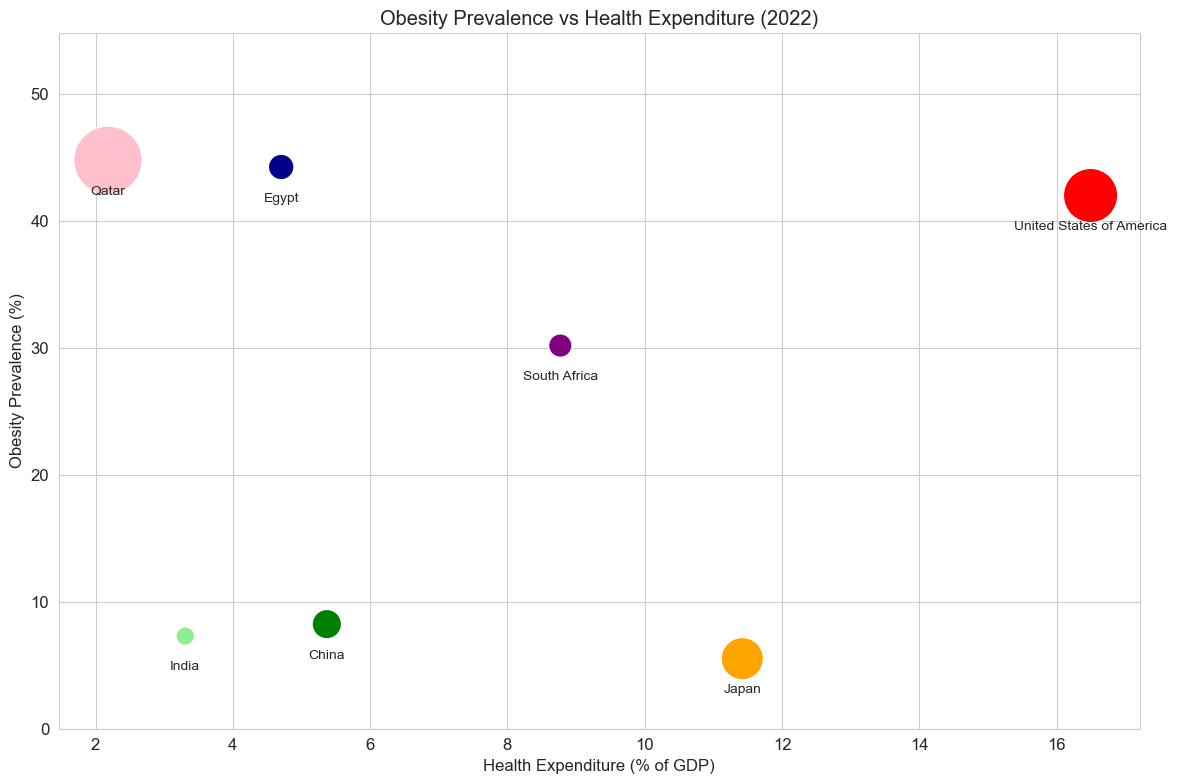

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the countries to highlight
highlight_countries = ['USA', 'JPN', 'ZAF', 'EGY', 'QAT', 'CHN', 'IND']

# Filter the merged dataset for these countries
df_bubble = merged_df[merged_df['ISO3'].isin(highlight_countries)]

# Pick only the main adult obesity measure
df_bubble = df_bubble[df_bubble['Measure_clean'] == 
                      'prevalence of obesity among adults, bmi &greaterequal; 30 (age-standardized estimate) (%)']

# Aggregate to ensure one row per country
df_bubble = df_bubble.groupby(['ISO3', 'Country_WHO', 'Country_WB']).agg({
    'Value': 'mean',  # obesity %
    'Current health expenditure (% of GDP)': 'mean',
    'GDP per capita, PPP (current international $)': 'mean'
}).reset_index()

# Set up the plot
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))

# Bubble size proportional to GDP per capita
sizes = df_bubble['GDP per capita, PPP (current international $)'] / 1000  # scale down for plotting

# Plot bubble chart
sns.scatterplot(
    data=df_bubble,
    x='Current health expenditure (% of GDP)',
    y='Value',
    hue='ISO3',
    s=sizes*20,  # multiply for visibility
    palette=['green', 'darkblue', 'lightgreen', 'orange', 'pink', 'red', 'purple'],
    legend=False
)

# Annotate countries **underneath the bubble**
for i, row in df_bubble.iterrows():
    plt.text(
        row['Current health expenditure (% of GDP)'],  # x at bubble center
        row['Value'] - 2,                            # y slightly below bubble
        row['Country_WHO'],
        fontsize=10,
        ha='center',                                   # center align horizontally
        va='top'                                       # align top of text to y position
    )

plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Obesity Prevalence (%)')
plt.title('Obesity Prevalence vs Health Expenditure (2022)')
plt.ylim(0, df_bubble['Value'].max() + 10)  # give some space above the highest bubble
plt.tight_layout()
plt.show()


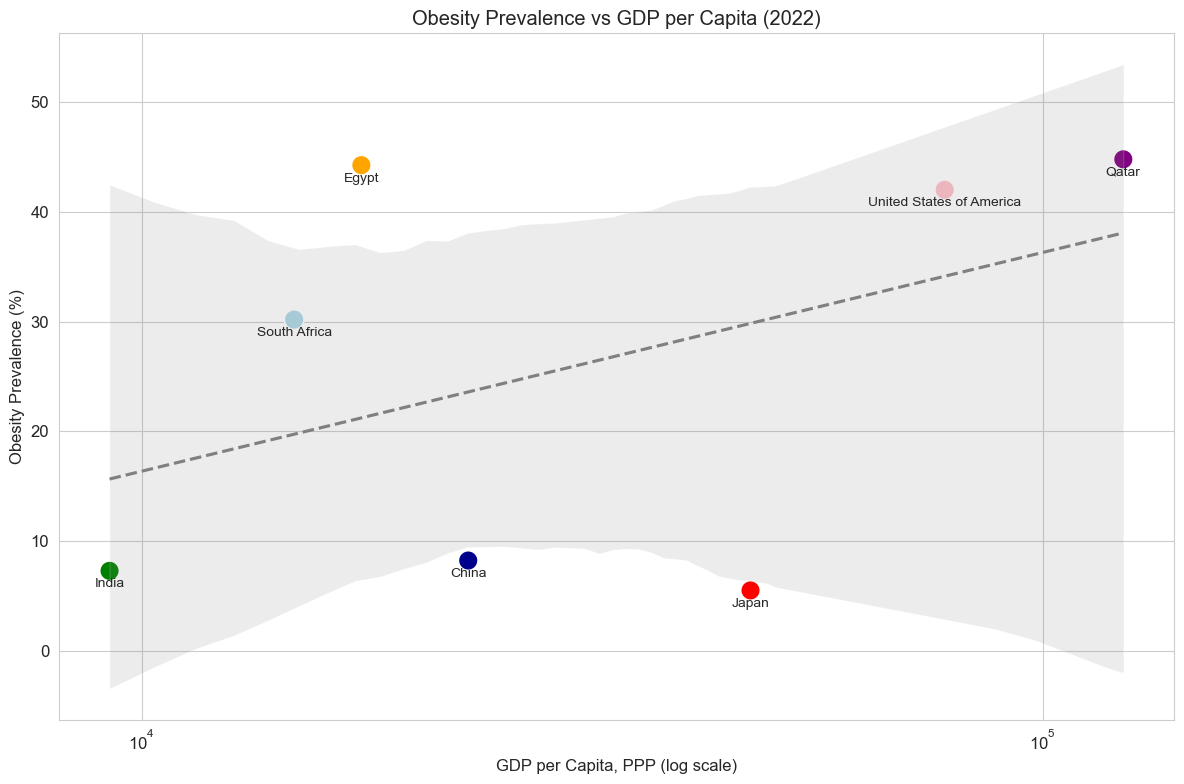

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Choose countries for highlighting
highlight_countries = ['USA', 'JPN', 'ZAF', 'EGY', 'QAT', 'CHN', 'IND']

# Filter for the latest obesity measure
df_gdp = merged_df[merged_df['ISO3'].isin(highlight_countries)]
df_gdp = df_gdp[df_gdp['Measure_clean'] == 
                'prevalence of obesity among adults, bmi &greaterequal; 30 (age-standardized estimate) (%)']

# Aggregate to ensure one row per country
df_gdp = df_gdp.groupby(['ISO3', 'Country_WHO', 'Country_WB']).agg({
    'Value': 'mean',  # obesity %
    'GDP per capita, PPP (current international $)': 'mean'
}).reset_index()

# Plot
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))

# Scatterplot
sns.scatterplot(
    data=df_gdp,
    x='GDP per capita, PPP (current international $)',
    y='Value',
    hue='ISO3',
    s=200,
    palette=['darkblue','orange','green','red','purple','pink','lightblue'],
    legend=False
)

# Regression line
sns.regplot(
    data=df_gdp,
    x='GDP per capita, PPP (current international $)',
    y='Value',
    scatter=False,
    logx=True,
    line_kws={'color':'grey','linestyle':'--'}
)

# Annotate countries below the points
for i, row in df_gdp.iterrows():
    plt.text(row['GDP per capita, PPP (current international $)'],
             row['Value'] - 1.5,  # place text slightly below the point
             row['Country_WHO'],
             fontsize=10,
             ha='center')

plt.xscale('log')
plt.xlabel('GDP per Capita, PPP (log scale)')
plt.ylabel('Obesity Prevalence (%)')
plt.title('Obesity Prevalence vs GDP per Capita (2022)')
plt.tight_layout()
plt.show()


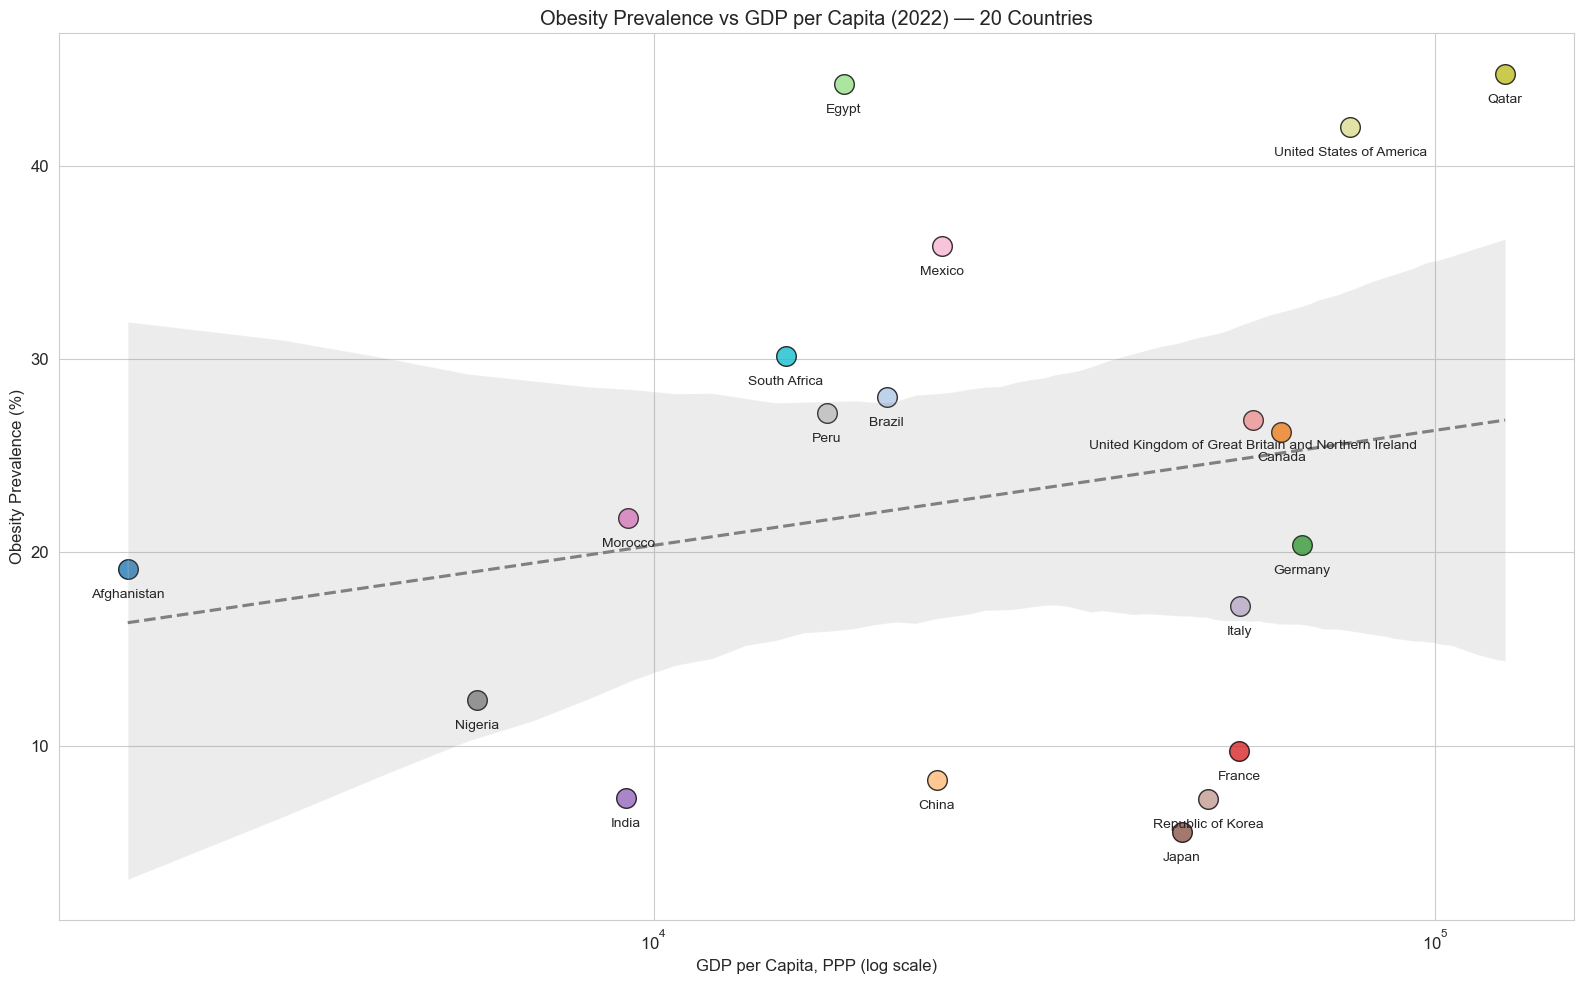

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of 20 hand-picked countries
highlight_countries = [
    'USA', 'JPN', 'ZAF', 'EGY', 'QAT', 'CHN', 'IND',  # original highlights
    'CAN', 'MEX', 'BRA', 'PER',                        # Americas
    'DEU', 'FRA', 'ITA', 'GBR', 'KOR', 'AFG',         # Europe & Asia
    'NGA', 'MAR'                                # Africa
]

# Filter for the latest obesity measure
df_gdp = merged_df[merged_df['ISO3'].isin(highlight_countries)]
df_gdp = df_gdp[df_gdp['Measure_clean'] == 
                'prevalence of obesity among adults, bmi &greaterequal; 30 (age-standardized estimate) (%)']

# Aggregate to ensure one row per country
df_gdp = df_gdp.groupby(['ISO3', 'Country_WHO', 'Country_WB']).agg({
    'Value': 'mean',  # obesity %
    'GDP per capita, PPP (current international $)': 'mean'
}).reset_index()

# Set up the plot
sns.set_style('whitegrid')
plt.figure(figsize=(16,10))

# Assign a distinct color to each country using tab20
num_countries = len(df_gdp)
colors = sns.color_palette("tab20", num_countries)

# Scatterplot
for i, row in df_gdp.iterrows():
    plt.scatter(
        row['GDP per capita, PPP (current international $)'],
        row['Value'],
        s=200,
        color=colors[i],
        edgecolor='k',
        alpha=0.8
    )
    # Annotate countries below the points
    plt.text(
        row['GDP per capita, PPP (current international $)'],
        row['Value'] - 1.5,  # slightly below point
        row['Country_WHO'],
        fontsize=10,
        ha='center'
    )

# Regression line (log scale for x)
sns.regplot(
    data=df_gdp,
    x='GDP per capita, PPP (current international $)',
    y='Value',
    scatter=False,
    logx=True,
    line_kws={'color':'grey','linestyle':'--'}
)

plt.xscale('log')
plt.xlabel('GDP per Capita, PPP (log scale)')
plt.ylabel('Obesity Prevalence (%)')
plt.title('Obesity Prevalence vs GDP per Capita (2022) — 20 Countries')
plt.tight_layout()
plt.show()


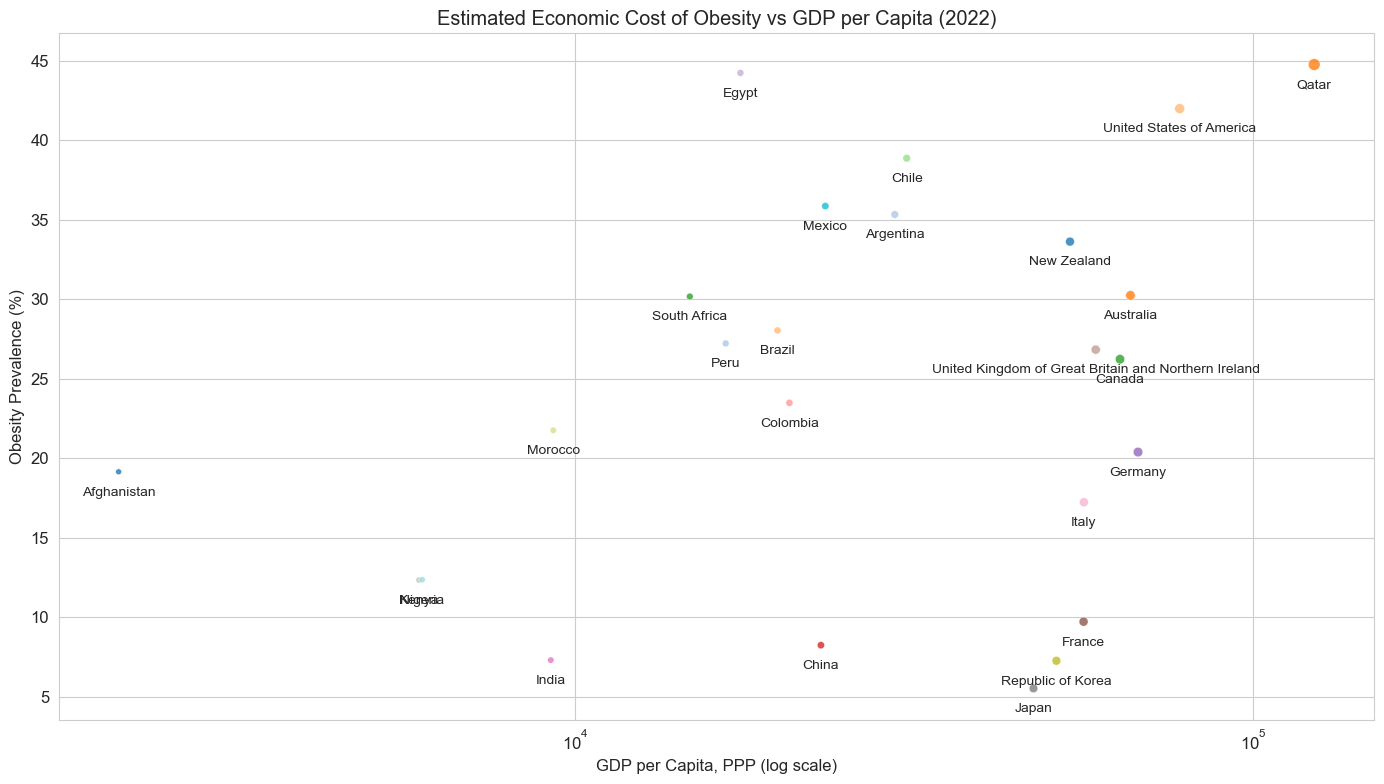

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hand-picked 25 countries
selected_countries = [
    'USA', 'CAN', 'MEX', 'BRA', 'PER', 
    'DEU', 'FRA', 'ITA', 'GBR', 'QAT',
    'IND', 'AFG', 'CHN', 'JPN', 'KOR', 
    'ZAF', 'NGA', 'EGY', 'KEN', 'MAR',
    'ARG', 'CHL', 'AUS', 'NZL', 'COL'
]

# Filter for selected countries
df_cost = merged_df[merged_df['ISO3'].isin(selected_countries)]

# Pick only adult obesity measure
df_cost = df_cost[df_cost['Measure_clean'] == 
                  'prevalence of obesity among adults, bmi &greaterequal; 30 (age-standardized estimate) (%)']

# Aggregate to ensure one row per country
df_cost = df_cost.groupby(['ISO3', 'Country_WHO']).agg({
    'Value': 'mean',
    'GDP per capita, PPP (current international $)': 'mean',
    'Current health expenditure (% of GDP)': 'mean'  # optional
}).reset_index()

# Estimate obesity cost as % of GDP
OBESITY_COST_PERCENT = 0.0219
df_cost['Obesity_Cost_USD'] = df_cost['GDP per capita, PPP (current international $)'] * OBESITY_COST_PERCENT

# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))

# Bubble sizes proportional to estimated obesity cost
bubble_sizes = df_cost['Obesity_Cost_USD'] / df_cost['Obesity_Cost_USD'].max() * 2000

# Scatter plot
sns.scatterplot(
    data=df_cost,
    x='GDP per capita, PPP (current international $)',
    y='Value',
    size=bubble_sizes,
    hue='ISO3',
    palette='tab20',
    legend=False,
    alpha=0.8
)

# Annotate countries underneath each bubble
for i, row in df_cost.iterrows():
    plt.text(
        row['GDP per capita, PPP (current international $)'],
        row['Value'] - 1.5,
        row['Country_WHO'],
        fontsize=10,
        ha='center'
    )

plt.xscale('log')
plt.xlabel('GDP per Capita, PPP (log scale)')
plt.ylabel('Obesity Prevalence (%)')
plt.title('Estimated Economic Cost of Obesity vs GDP per Capita (2022)')
plt.tight_layout()
plt.show()


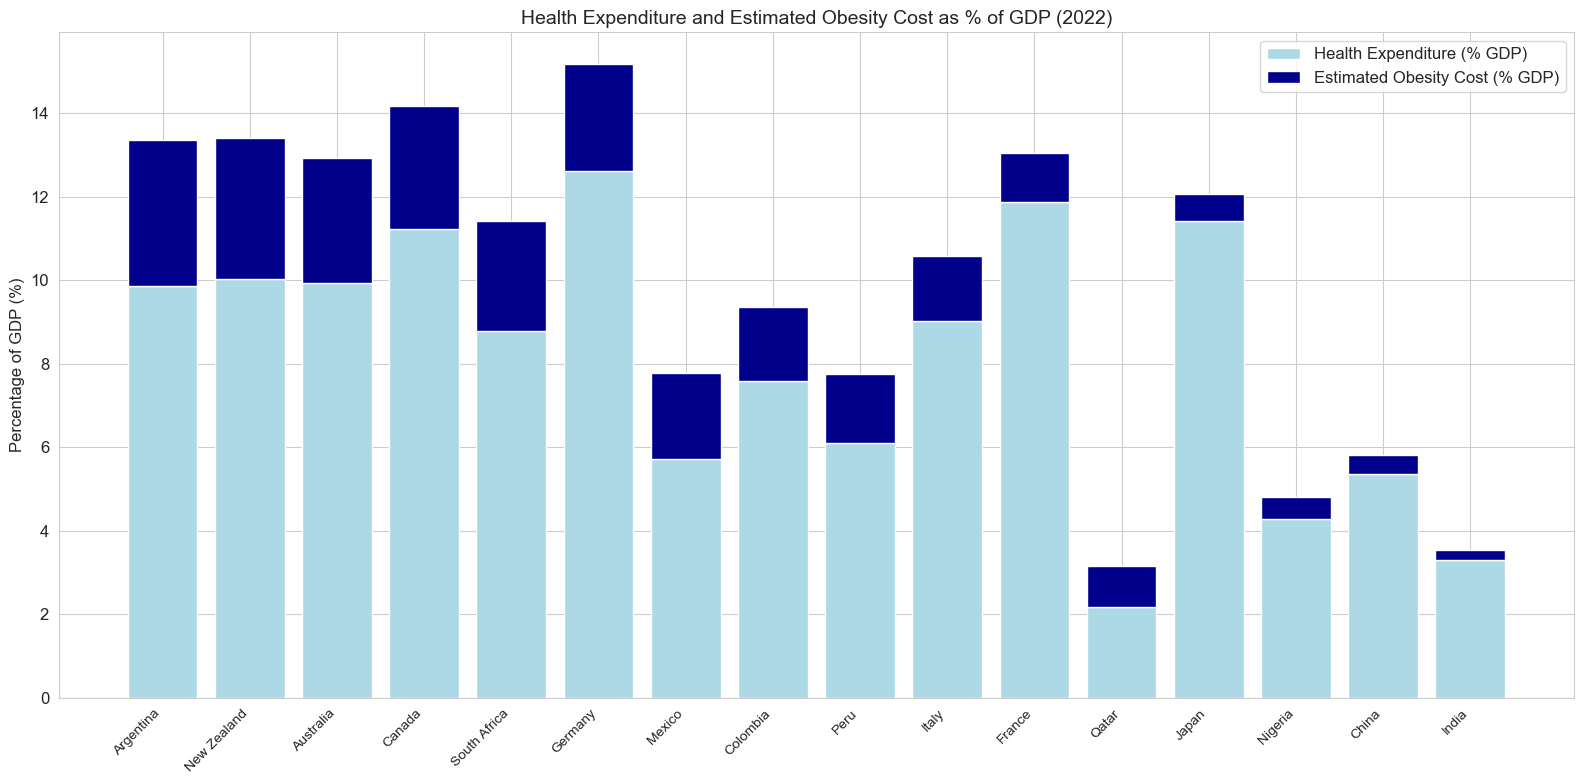

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of selected countries 
selected_countries = [
    'CAN', 'MEX', 'PER', 
    'DEU', 'FRA', 'ITA', 'GBR', 'QAT',
    'IND', 'CHN', 'JPN', 'KOR',
    'ZAF', 'NGA', 'EGY',  
    'ARG', 'AUS', 'NZL', 'COL'
]

# Filter dataset for these countries
df_bar = merged_df_clean[merged_df_clean['ISO3'].isin(selected_countries)]

# Aggregate to get one row per country
df_bar = df_bar.groupby(['Country', 'ISO3']).agg({
    'GDP per capita, PPP (current international $)':'mean',
    'Current health expenditure (% of GDP)':'mean',
    'Value':'mean'  # Obesity prevalence
}).reset_index()

# Estimated obesity cost as % of GDP
df_bar['Obesity_Cost_Percent_GDP'] = df_bar['Value'] * df_bar['Current health expenditure (% of GDP)'] / 100

# Sort by obesity cost for better visualization
df_bar = df_bar.sort_values('Obesity_Cost_Percent_GDP', ascending=False)

# Plot stacked bar chart
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

plt.bar(df_bar['Country'], df_bar['Current health expenditure (% of GDP)'], 
        label='Health Expenditure (% GDP)', color='lightblue')
plt.bar(df_bar['Country'], df_bar['Obesity_Cost_Percent_GDP'], 
        bottom=df_bar['Current health expenditure (% of GDP)'],
        label='Estimated Obesity Cost (% GDP)', color='darkblue')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Percentage of GDP (%)')
plt.title('Health Expenditure and Estimated Obesity Cost as % of GDP (2022)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [217]:
merged_df_clean[merged_df_clean['ISO3'] == 'USA'][['Value','Current health expenditure (% of GDP)','GDP per capita, PPP (current international $)']]


,Value,Current health expenditure (% of GDP),"GDP per capita, PPP (current international $)"
